# Salary Predictions Based on Job Descriptions

## Part 1 - Defining the Problem

### --------

The purpose of this project is to find a model that will accurately predict salary. My measure of efficacy will be mean squared error (MSE) because ________ and I'm goaling myself to achieve an MSE score of 320 or lower. I will be exploring my data to determine the best features to be utilized for the model and cleaning data up where needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

#your info here
__author__ = "Ashley Stacey"
__email__ = "ashley.stacey25@gmail.com"

## Part 2 - Discover

### ---- Loading the Data ----

In [2]:
#loading data in to dataframes
features_df = pd.read_csv('train_features.csv')
target_df = pd.read_csv('train_salaries.csv')

In [3]:
#checking each DF
features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


### ---- Cleaning and Exploring the Data ----

In [5]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
print('Target DF Number of Duplicates: ', target_df.duplicated().sum())
print('Feature DF Number of Dumplicates: ', features_df.duplicated().sum())

Target DF Number of Duplicates:  0
Feature DF Number of Dumplicates:  0


In [6]:
#checking for nulls in each of the DFs
target_df.isnull().sum()

jobId     0
salary    0
dtype: int64

In [7]:
features_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [8]:
#checking for extremely low or $0 salaries
target_df[target_df['salary'] <= 10]

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [9]:
#creating a list of job IDs with zero salary
zero_salary_list = target_df[target_df['salary'] <= 10].jobId.to_list()

In [10]:
#finding subset of features DF to see which jobs are showing 0 salary
features_df[features_df['jobId'].isin(zero_salary_list)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29


In [11]:
#checking number of observations in features DF
features_df.shape

(1000000, 8)

In [12]:
#removing 0 salary jobIds from both features and target DFs
features_delete_rows = features_df[features_df['jobId'].isin(zero_salary_list)].index
target_delete_rows = target_df[target_df['jobId'].isin(zero_salary_list)].index

features_df.drop(features_delete_rows, inplace=True)
target_df.drop(target_delete_rows, inplace=True)

In [13]:
#checking degree listings where major is unlisted
features_df[(features_df['major'] == 'NONE') & (~features_df['degree'].isin(['HIGH_SCHOOL','NONE']))].degree.unique()

array(['BACHELORS', 'MASTERS', 'DOCTORAL'], dtype=object)

In [14]:
features_df[(features_df['major'] == 'NONE') & (~features_df['degree'].isin(['HIGH_SCHOOL','NONE']))].shape

(58525, 8)

In [15]:
print('Percent of Obs With Higher Degree, No Major: ', '{:.1%}'.format(58525/1000000))

Percent of Obs With Higher Degree, No Major:  5.9%


In [16]:
#summarize the target variable
target_df.describe()

,salary
count,999995.000000
mean,116.062398
std,38.717163
min,17.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [17]:
print('Salary IQR: ', 141-88)
print('Salary Median: ', 114)
print('--------')
print('Salary Range: ', 301-17)
print('Salary Mean: ', 116.1)

Salary IQR:  53
Salary Median:  114
--------
Salary Range:  284
Salary Mean:  116.1


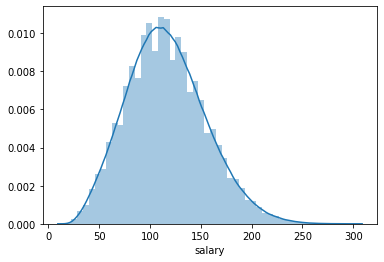

In [18]:
sns.distplot(target_df['salary'])

In [19]:
features_df.describe()

,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000
mean,11.992407,49.529381
std,7.212390,28.877721
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [20]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 68.7+ MB


In [21]:
print('Years IQR: ', 18-6)
print('Years Median: ', 12)
print('--------')
print('Years Range: ', 24-0)
print('Years Mean: ', 11.99)

Years IQR:  12
Years Median:  12
--------
Years Range:  24
Years Mean:  11.99


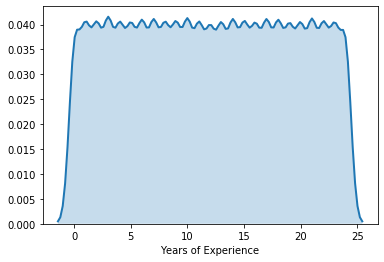

In [22]:
sns.distplot(features_df['yearsExperience'], hist=False, kde =True, kde_kws={'shade': True, 'linewidth': 2}, axlabel='Years of Experience')

In [23]:
print('Miles IQR: ', 75-25)
print('Miles Median: ', 50)
print('--------')
print('Miles Range: ', 99-0)
print('Miles Mean: ', 49.5)

Miles IQR:  50
Miles Median:  50
--------
Miles Range:  99
Miles Mean:  49.5


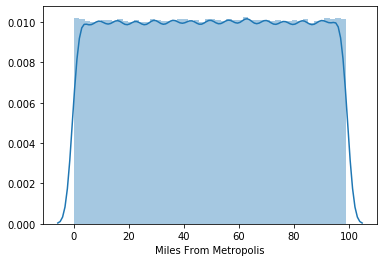

In [24]:
sns.distplot(features_df['milesFromMetropolis'], axlabel='Miles From Metropolis')

In [25]:
degree_order=['NONE','HIGH_SCHOOL','BACHELORS','MASTERS','DOCTORAL']
job_type_order=['JANITOR','JUNIOR','SENIOR','MANAGER','VICE_PRESIDENT','CTO','CFO','CEO']

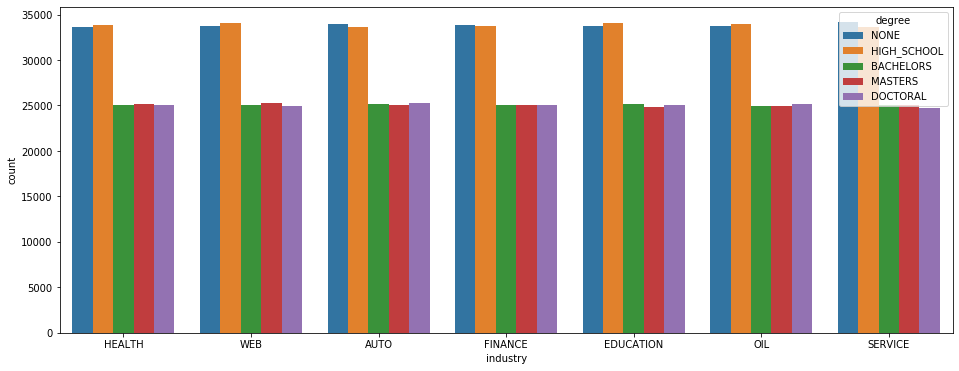

In [26]:
# do certain industries have a higher number of advanced or no degrees?
plt.figure(figsize=(16, 6))
sns.countplot(x='industry', hue='degree', hue_order=degree_order, data=features_df)

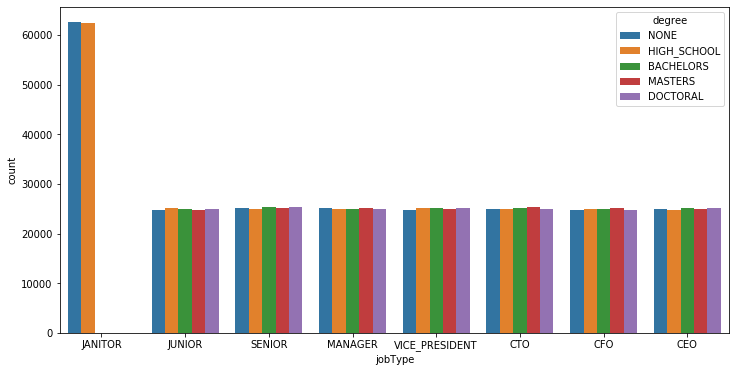

In [27]:
# do certain job types have a higher number of advanced or no degrees?
plt.figure(figsize=(12, 6))
sns.countplot(x='jobType', order=job_type_order, hue='degree', hue_order=degree_order, data=features_df)

In [28]:
#confirming that janitors are only NONE and HIGH_SCHOOL for degree type
features_df[features_df['jobType']=='JANITOR'].degree.value_counts()

NONE           62544
HIGH_SCHOOL    62427
Name: degree, dtype: int64

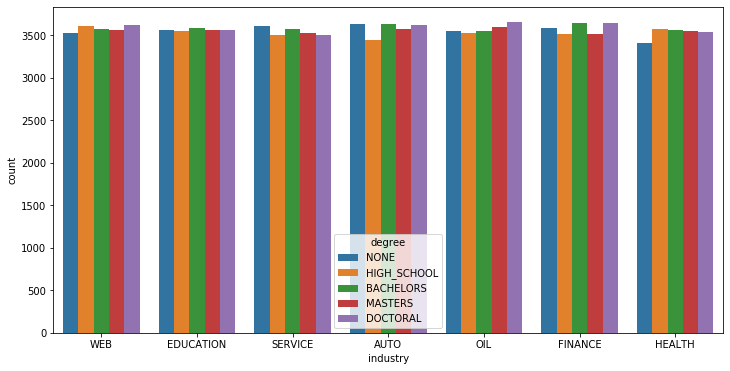

In [29]:
# do CEOs in specific industries have a greater number of higher degrees?
plt.figure(figsize=(12,6))
sns.countplot(x='industry', hue='degree', hue_order=degree_order
             , data=features_df[features_df['jobType']=='CEO'])

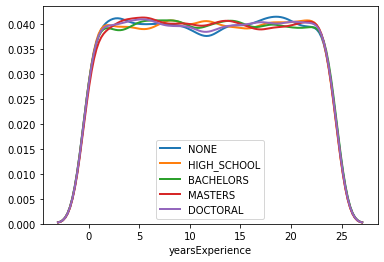

In [30]:
#do CEOs with no degree have more years of experience than others?

CEO_df=features_df[features_df['jobType']=='CEO']

for degree in degree_order:
    subset = CEO_df[CEO_df['degree']==degree]
    
    sns.distplot(subset['yearsExperience'], hist=False, kde=True,
                 kde_kws = {'shade': False, 'linewidth': 2}, 
                  label = degree)


In [31]:
#merge dataframes and check head
df = pd.merge(features_df, target_df, on='jobId')

df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


<Figure size 864x864 with 0 Axes>

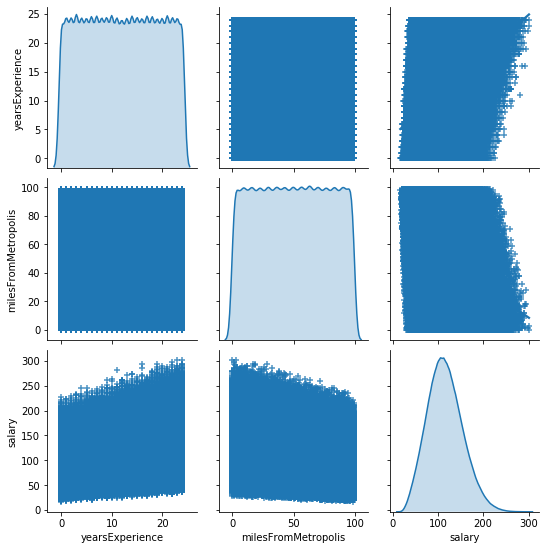

In [32]:
plt.figure(figsize=(12,12))
sns.pairplot(df, kind='reg', diag_kind='kde', markers='+')

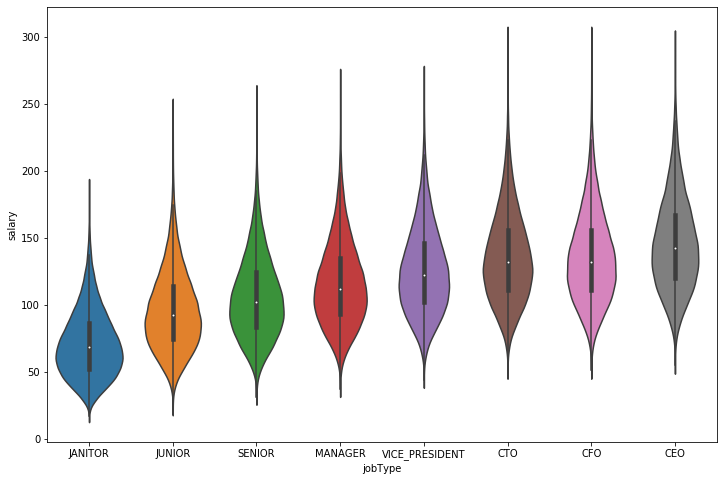

In [33]:
plt.figure(figsize=(12,8))
sns.violinplot(x='jobType', y='salary', data=df, order=job_type_order)

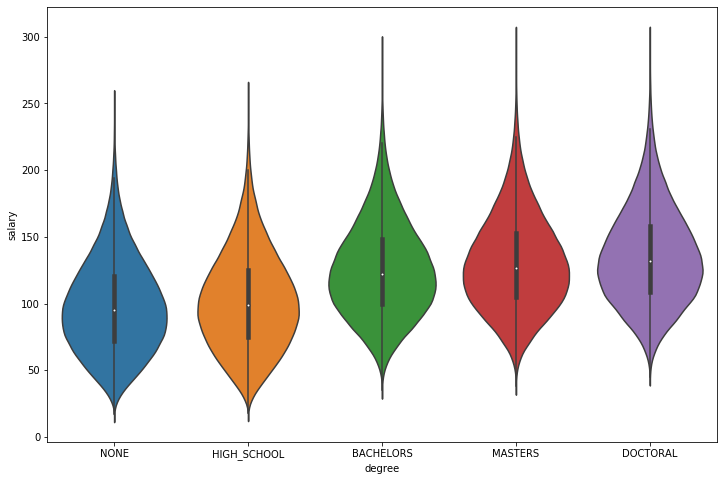

In [34]:
plt.figure(figsize=(12,8))
sns.violinplot(x='degree', y='salary', data=df, order=degree_order)

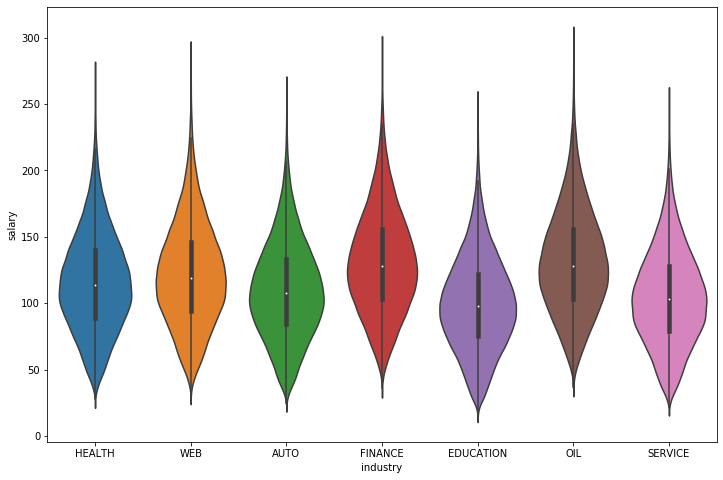

In [35]:
plt.figure(figsize=(12,8))
sns.violinplot(x='industry', y='salary', data=df)

In [36]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [37]:
degree_vals = [0,1,2,3,4]

In [38]:
degree_dict = dict(zip(degree_order,degree_vals))

In [39]:
job_type_vals = [0,1,2,3,4,5,6,7]

job_type_dict = dict(zip(job_type_order,job_type_vals))

In [40]:
df['degree_code'] = df.degree.map(degree_dict)
df['jobType_code'] = df.jobType.map(job_type_dict)

df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,degree_code,jobType_code
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,3,6
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,1,7
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,4,4
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,4,3
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,2,4


In [41]:
degree_order

['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']

In [42]:
major_df = pd.get_dummies(df['major'])

major_df.head()

,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [43]:
major_df.drop(labels='NONE', axis=1, inplace=True)

In [44]:
industry_df = pd.get_dummies(df['industry'])

industry_df.drop(industry_df.columns[0], axis=1, inplace=True)

industry_df.head()

,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [45]:
df = pd.concat([df, major_df, industry_df], axis=1)

In [46]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,degree_code,...,ENGINEERING,LITERATURE,MATH,PHYSICS,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,3,...,0,0,1,0,0,0,1,0,0,0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,1,...,0,0,0,0,0,0,0,0,0,1
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,4,...,0,0,0,1,0,0,1,0,0,0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,4,...,0,0,0,0,0,0,0,0,0,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,2,...,0,0,0,1,0,1,0,0,0,0


In [47]:
df = df[['jobId','companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis','degree_code','jobType_code','BIOLOGY','BUSINESS','CHEMISTRY','COMPSCI','ENGINEERING','LITERATURE','MATH','PHYSICS','EDUCATION','FINANCE','HEALTH','OIL','SERVICE','WEB','salary']]

In [48]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_code,jobType_code,...,LITERATURE,MATH,PHYSICS,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,3,6,...,0,1,0,0,0,1,0,0,0,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,1,7,...,0,0,0,0,0,0,0,0,1,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,4,4,...,0,0,1,0,0,1,0,0,0,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,4,3,...,0,0,0,0,0,0,0,0,0,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,2,4,...,0,0,1,0,1,0,0,0,0,163


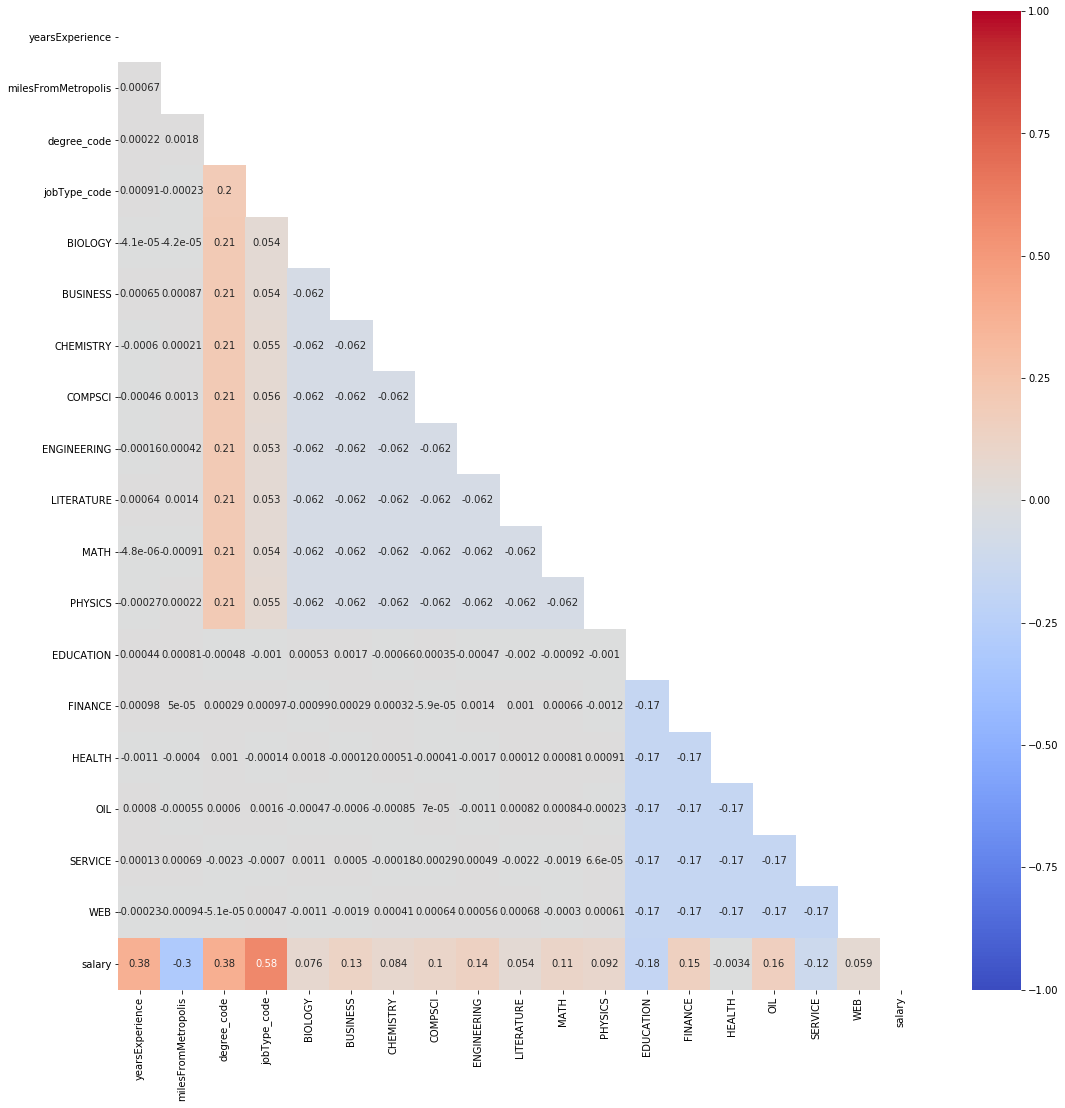

In [49]:
mask = np.zeros(df.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(18,18))

sns.heatmap(df.corr(), annot=True, center=0, vmin=-1, vmax=1, cmap='coolwarm', mask=mask)

### ---- 5 Establish a baseline ----

In [50]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [51]:
feature_cols = ['yearsExperience','milesFromMetropolis','degree_code','jobType_code','BUSINESS'
               ,'COMPSCI','ENGINEERING','MATH','PHYSICS','EDUCATION','FINANCE','OIL','SERVICE']

In [52]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df.salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [53]:
from sklearn.metrics import mean_squared_error

y_null = np.zeros_like(y_train, dtype=float)
y_null.fill(y_train.mean())
mean_squared_error(y_train, y_null)

1500.1398789385628

### ---- 6 Hypothesize solution ----

In [54]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

#### Linear Regression Model

In [55]:
def cross_val_5(model, features, target):
    scores = cross_val_score(model,features,target, cv=5, scoring='neg_mean_squared_error')
    print(model)
    print('----------------------')
    print('Average cross-validation score: {:.2f}'.format(- scores.mean()))
    print('Standard deviation: {:.2f}'.format(scores.std()))

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

In [57]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
cross_val_5(lin_reg, X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
----------------------
Average cross-validation score: 407.91
Standard deviation: 1.68


#### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()

In [60]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
cross_val_5(decision_tree, X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
----------------------
Average cross-validation score: 700.54
Standard deviation: 1.80


In [62]:
# importing Grid Search
from sklearn.model_selection import GridSearchCV

# setting parameter grid for grid search to iterate through
dt_param_grid = {'max_depth':[2,4,6,8,10,12,14,16]
                , 'min_samples_split':[10,20,30,40,50,60,70]
                }

In [63]:
# set up grid search for decision tree
dt_grid_search = GridSearchCV(decision_tree, dt_param_grid, cv=5, scoring='neg_mean_squared_error')

In [64]:
# create function that trains grid search and returns best parameters
def train_grid_search(model):
    model.fit(X_train, y_train)
    
    print('Best parameters: ' + str(model.best_params_))
    print('Best cross-val score: {:.2f}'.format(- model.best_score_))
    print('Best test score: {:.2f}'.format(- model.score(X_test, y_test)))

In [65]:
train_grid_search(dt_grid_search)

Best parameters: {'max_depth': 16, 'min_samples_split': 70}
Best cross-val score: 403.27
Best test score: 400.17


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

In [67]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
cross_val_5(random_forest, X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
Average cross-validation score: 476.84
Standard deviation: 1.68


#### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()

In [72]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
cross_val_5(gb_reg, X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
----------------------
Average cross-validation score: 381.92
Standard deviation: 2.19


In [74]:
gb_param_grid = {'n_estimators':[100,200,300]
                , 'min_samples_split':[2,10,20]}

In [75]:
gb_grid_search = GridSearchCV(gb_reg, gb_param_grid, cv=5, scoring='neg_mean_squared_error')

train_grid_search(gb_grid_search)

Best parameters: {'min_samples_split': 2, 'n_estimators': 300}
Best cross-val score: 375.10
Best test score: 373.98


### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model